In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sequence = (np.random.randint(10, size=(100, 1)))
print(sequence.shape)

(100, 1)


In [3]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(sequence)
scaled_sequence = scalerX.transform(sequence)

In [4]:
df = pd.read_csv("D:\\Jupyter Notebooks\\datasets\\eCommerce Events History in Cosmetics Shop\\2019-Oct.csv")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,4.102283e+06,4.102283e+06,4.102283e+06,4.102283e+06
mean,5.468464e+06,1.545652e+18,8.534920e+00,5.013416e+08
std,1.321863e+06,1.563666e+17,1.913315e+01,8.171257e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.103071e+06
25%,5.723489e+06,1.487580e+18,2.140000e+00,4.692921e+08
50%,5.809115e+06,1.487580e+18,4.110000e+00,5.389695e+08
75%,5.850322e+06,1.487580e+18,7.140000e+00,5.575029e+08
max,5.900470e+06,2.195085e+18,3.076000e+02,5.662808e+08


In [6]:
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4034806
brand            1659261
price                  0
user_id                0
user_session         637
dtype: int64

In [7]:
df.shape

(4102283, 9)

In [8]:
df = df.drop(columns=['category_code', 'brand'], axis=1)

In [9]:
df.event_type.unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [10]:
df[df['user_session'].notna()].event_type.unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [11]:
df[df['user_session'].isna()].event_type.unique()

array(['cart', 'remove_from_cart', 'view'], dtype=object)

In [12]:
df[df['event_type']=='view'].count()

event_time      1862164
event_type      1862164
product_id      1862164
category_id     1862164
price           1862164
user_id         1862164
user_session    1862161
dtype: int64

In [13]:
df.drop(df[df['event_type']!='view'].index, inplace=True)

In [14]:
df['url'] = "dummysite.com/" + df['event_type'] + "/" + df['category_id'].astype(str) + "/" + df['product_id'].astype(str) + "/userid=" + df['user_session'].astype(str)

In [15]:
df['url'].head()

9     dummysite.com/view/2029082628195353599/5875317...
10    dummysite.com/view/1487580004857414477/5692917...
19    dummysite.com/view/1487580008162526182/5819638...
21    dummysite.com/view/1487580006350586771/5856191...
39    dummysite.com/view/1487580009362096156/5733176...
Name: url, dtype: object

In [16]:
df.sort_values(by=['user_session', 'event_time'], inplace=True)

In [17]:
df.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,url
3008486,2019-10-23 09:07:38 UTC,view,5859210,1487580010872045658,0.48,405771061,000013d6-68a4-40cf-9452-6577dbfab515,dummysite.com/view/1487580010872045658/5859210...
3009077,2019-10-23 09:12:50 UTC,view,30195,1487580010922377308,0.38,405771061,000013d6-68a4-40cf-9452-6577dbfab515,dummysite.com/view/1487580010922377308/30195/u...
1037295,2019-10-07 19:35:37 UTC,view,5646845,1487580008984608779,15.79,437891561,000027d7-5077-4a81-89de-ce2c4936a28f,dummysite.com/view/1487580008984608779/5646845...
2870668,2019-10-22 08:29:50 UTC,view,5682289,1487580009362096156,3.79,534154250,00002e32-16ef-4770-9ec0-36ef9d1c888f,dummysite.com/view/1487580009362096156/5682289...
2314660,2019-10-17 15:33:24 UTC,view,5677454,1487580009143992338,6.83,321400452,00003443-8504-4e24-8e86-e8e86d486826,dummysite.com/view/1487580009143992338/5677454...


In [18]:
df[df['user_session']=='8930ec72-36b0-4be9-80c7-af93b9f477c6']

,event_time,event_type,product_id,category_id,price,user_id,user_session,url
2830949,2019-10-21 21:11:09 UTC,view,5784982,2195085255034011676,4.60,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5784982...
2831152,2019-10-21 21:13:30 UTC,view,5795273,1516331853567492962,3.41,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/1516331853567492962/5795273...
2831200,2019-10-21 21:14:02 UTC,view,5670334,2195085255034011676,2.38,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5670334...
2831329,2019-10-21 21:15:42 UTC,view,5735272,2195085255034011676,2.37,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5735272...
2831839,2019-10-21 21:22:07 UTC,view,5563536,2195085255034011676,3.02,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5563536...
2831912,2019-10-21 21:22:59 UTC,view,5858353,2195085255034011676,1.98,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5858353...
2832031,2019-10-21 21:24:19 UTC,view,5784982,2195085255034011676,4.60,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,dummysite.com/view/2195085255034011676/5784982...


In [19]:
df.groupby(by=['user_id', 'user_session']).count()

event_time  event_type  \
user_id   user_session                                                   
4103071   8930ec72-36b0-4be9-80c7-af93b9f477c6           7           7   
8846226   ddd23270-792c-49f3-9ae2-d86f5080a5eb           3           3   
          f835c9a8-cb8a-4201-85d4-00565bcc84ad           4           4   
9794320   1be8fa80-8036-4d95-93da-494a08d82cb5           2           2   
          9f8afcc5-abe6-47a6-93d5-290d350cea5e           1           1   
...                                                    ...         ...   
566279639 c2cd9fb0-ad5c-476d-862e-4a48420ebc6a           1           1   
566279883 bd4d4392-42ad-4373-a8cd-1c7a4bd6b01a           1           1   
566279996 21512135-c819-4fef-885d-76607526652b           1           1   
566280278 5c4f78a3-ebf5-4606-946f-6a3a0b8852d2           2           2   
566280798 4eaf7c71-e8bf-4ea6-b719-eca144466eb3           1           1   

                                                product_id  category_id  \
user_id   user_session                                                    
4103071   8930ec72-36b0-4be9-80c7-af93b9f477c6           7            7   
8846226   ddd23270-792c-49f3-9ae2-d86f5080a5eb           3            3   
          f835c9a8-cb8a-4201-85d4-00565bcc84ad           4            4   
9794320   1be8fa80-8036-4d95-93da-494a08d82cb5           2            2   
          9f8afcc5-abe6-47a6-93d5-290d350cea5e           1            1   
...                                                    ...          ...   
566279639 c2cd9fb0-ad5c-476d-862e-4a48420ebc6a           1            1   
566279883 bd4d4392-42ad-4373-a8cd-1c7a4bd6b01a           1            1   
566279996 21512135-c819-4fef-885d-76607526652b           1            1   
566280278 5c4f78a3-ebf5-4606-946f-6a3a0b8852d2           2            2   
566280798 4eaf7c71-e8bf-4ea6-b719-eca144466eb3           1            1   

                                                price  url  
user_id   user_session                                      
4103071   8930ec72-36b0-4be9-80c7-af93b9f477c6      7    7  
8846226   ddd23270-792c-49f3-9ae2-d86f5080a5eb      3    3  
          f835c9a8-cb8a-4201-85d4-00565bcc84ad      4    4  
9794320   1be8fa80-8036-4d95-93da-494a08d82cb5      2    2  
          9f8afcc5-abe6-47a6-93d5-290d350cea5e      1    1  
...                                               ...  ...  
566279639 c2cd9fb0-ad5c-476d-862e-4a48420ebc6a      1    1  
566279883 bd4d4392-42ad-4373-a8cd-1c7a4bd6b01a      1    1  
566279996 21512135-c819-4fef-885d-76607526652b      1    1  
566280278 5c4f78a3-ebf5-4606-946f-6a3a0b8852d2      2    2  
566280798 4eaf7c71-e8bf-4ea6-b719-eca144466eb3      1    1  

[826170 rows x 6 columns]

In [20]:
df['product_id'].unique().shape

(41372,)

In [21]:
df['category_id'].unique().shape

(489,)

In [22]:
df['url_small'] = "dummysite.com/" + df['event_type'] + "/" + df['category_id'].astype(str) + "/" + df['product_id'].astype(str) + "/"

In [23]:
df['url_small'].unique().shape

(41372,)

In [86]:
#df['product_id'] = df['product_id'].astype("string")

In [87]:
df["product_id_code"] = df['product_id'] - df['product_id'].min()

In [89]:
df['product_id'].min()

3752

In [123]:
di = dict(zip(df.product_id.unique(),np.arange(products)))
df['product_id_code'] = df['product_id'].map(di)

In [90]:
#di = dict(zip(df.product_id.unique(),np.arange(products)))
#df['product_id_code'] =df['product_id'].replace(di)

KeyboardInterrupt: 

In [124]:
dataset = df.groupby(['user_id', 'user_session']).product_id_code.unique().apply(list).reset_index()
dataset

,user_id,user_session,product_id_code
0,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,"[4279, 5704, 1642, 14499, 4083, 4277]"
1,8846226,ddd23270-792c-49f3-9ae2-d86f5080a5eb,"[22450, 1935, 10990]"
2,8846226,f835c9a8-cb8a-4201-85d4-00565bcc84ad,"[20230, 8624, 22450, 5388]"
3,9794320,1be8fa80-8036-4d95-93da-494a08d82cb5,"[1744, 8735]"
4,9794320,9f8afcc5-abe6-47a6-93d5-290d350cea5e,[1744]
...,...,...,...
826165,566279639,c2cd9fb0-ad5c-476d-862e-4a48420ebc6a,[33736]
826166,566279883,bd4d4392-42ad-4373-a8cd-1c7a4bd6b01a,[206]
826167,566279996,21512135-c819-4fef-885d-76607526652b,[567]
826168,566280278,5c4f78a3-ebf5-4606-946f-6a3a0b8852d2,"[130, 24059]"


In [61]:
dataset[[len(x)<=2 for x in dataset.product_id]]

,user_id,user_session,product_id
3,9794320,1be8fa80-8036-4d95-93da-494a08d82cb5,"[5844670, 5824819]"
4,9794320,9f8afcc5-abe6-47a6-93d5-290d350cea5e,[5844670]
7,10702733,09cd095c-eaf3-4a1b-9dff-d3e3ff4eb83c,"[5802651, 5802540]"
8,10968431,7d6f82ba-be84-4afc-9abd-bb96ee81e5fe,[5853467]
9,12055855,98b129c4-2ab1-4e89-8511-de4bf7f0d943,"[5770032, 5769907]"
...,...,...,...
826165,566279639,c2cd9fb0-ad5c-476d-862e-4a48420ebc6a,[5800421]
826166,566279883,bd4d4392-42ad-4373-a8cd-1c7a4bd6b01a,[5618276]
826167,566279996,21512135-c819-4fef-885d-76607526652b,[5700137]
826168,566280278,5c4f78a3-ebf5-4606-946f-6a3a0b8852d2,"[5809910, 5870981]"


In [126]:
dataset.drop(dataset[[len(x)<=2 for x in dataset.product_id_code]].index, inplace=True)

In [28]:
dataset.drop(columns=['user_id', 'user_session'], axis=1, inplace=True)

In [127]:
dataset

,user_id,user_session,product_id_code
0,4103071,8930ec72-36b0-4be9-80c7-af93b9f477c6,"[4279, 5704, 1642, 14499, 4083, 4277]"
1,8846226,ddd23270-792c-49f3-9ae2-d86f5080a5eb,"[22450, 1935, 10990]"
2,8846226,f835c9a8-cb8a-4201-85d4-00565bcc84ad,"[20230, 8624, 22450, 5388]"
5,10280338,e973c7ea-221b-4885-a593-23da8116a62b,"[597, 16163, 2661, 1877, 6071, 5643]"
6,10280338,fbacb4a3-2141-4f43-b9e5-97c911c7e770,"[597, 4575, 14636, 1791, 9027, 7957, 5743, 212..."
...,...,...,...
826112,566272734,573d9260-4f53-414b-9b96-7f2d135cbc64,"[1365, 5710, 27376, 9894]"
826113,566272856,87490d2e-4c97-49c2-b1a1-dda9b5668614,"[78, 7510, 20469]"
826121,566273933,63e1d079-4814-43a8-8ca9-1d2943aa3e42,"[7633, 25942, 11265]"
826122,566273978,c2d3b5fa-445a-432e-bfa8-bea9652e3cfe,"[9428, 7896, 18700, 738]"


In [129]:
seq = np.array(dataset.product_id_code)
#seq = dataset.product_id.to_numpy()
seq

array([list([4279, 5704, 1642, 14499, 4083, 4277]),
       list([22450, 1935, 10990]), list([20230, 8624, 22450, 5388]), ...,
       list([7633, 25942, 11265]), list([9428, 7896, 18700, 738]),
       list([24385, 8572, 10876, 26463, 8735])], dtype=object)

In [130]:
for row in range(len(seq)):
    a = []
    for i in range(len(seq[row])-2):
        a.append((seq[row][i], seq[row][i+1], seq[row][i+2]))
    seq[row] = a

In [131]:
seq

array([list([(4279, 5704, 1642), (5704, 1642, 14499), (1642, 14499, 4083), (14499, 4083, 4277)]),
       list([(22450, 1935, 10990)]),
       list([(20230, 8624, 22450), (8624, 22450, 5388)]), ...,
       list([(7633, 25942, 11265)]),
       list([(9428, 7896, 18700), (7896, 18700, 738)]),
       list([(24385, 8572, 10876), (8572, 10876, 26463), (10876, 26463, 8735)])],
      dtype=object)

In [134]:
sequences = []
for row in seq:
    for s in row:
        sequences.append(s)

In [135]:
sequences = np.array(sequences)
sequences

array([[ 4279,  5704,  1642],
       [ 5704,  1642, 14499],
       [ 1642, 14499,  4083],
       ...,
       [24385,  8572, 10876],
       [ 8572, 10876, 26463],
       [10876, 26463,  8735]], dtype=int64)

In [136]:
sequences.shape

(605178, 3)

In [137]:
X = sequences[:,:-1]
Y = sequences[:,-1]

In [109]:
print(X.shape, Y.shape)

(605178, 2) (605178,)


In [148]:
train_size = int(len(sequences) * 0.70)
test_size = len(sequences) - train_size
train, test = sequences[0:train_size, :], sequences[train_size:, :]
train_x, train_y = sequences[0:train_size, 0], sequences[0:train_size, 1]
test_x, test_y = sequences[train_size:, 0], sequences[train_size:, 1]

In [110]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense

In [138]:
products = len(df.product_id.unique())
products

41372

In [41]:
train

array([['5784982', '5795273'],
       ['5795273', '5670334'],
       ['5670334', '5735272'],
       ...,
       ['5875720', '5875719'],
       ['5875811', '5875809'],
       ['5875809', '5875810']], dtype='<U7')

In [42]:
Y = to_categorical(Y, num_classes=len(df.product_id.unique()))
Y

MemoryError: Unable to allocate 120. GiB for an array with shape (781760, 41372) and data type float32

In [43]:
np.reshape(train_x, (train_x.shape[0], -1, 1))

array([[['5784982']],

       [['5795273']],

       [['5670334']],

       ...,

       [['5875720']],

       [['5875811']],

       [['5875809']]], dtype='<U7')

In [188]:
import keras
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, labels, batch_size=32, dim=(32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.data = data
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_ID = [x for x in range(len(self.data))]
        # Find list of IDs
        list_IDs_temp = [self.data[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        #print(X)
        print(X.shape, y.shape)
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.data))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim), dtype=int)
        y = np.empty((self.batch_size), dtype=int)
        #di = dict(zip(self.labels,np.arange(self.n_classes)))
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            #print((ID[0], ID[1]))
            X[i,0] = ID[0]
            X[i,1] = ID[1]

            # Store class
            y[i] = ID[-1]
        return X, to_categorical(y, num_classes=self.n_classes)

In [189]:
training_generator = DataGenerator(train, df.product_id.unique(), n_classes=products, dim=(2,1))
validation_generator = DataGenerator(test, df.product_id.unique(), n_classes=products, dim=(2,1))

In [190]:
model = Sequential()
#model.add(Embedding(products, 5, input_length=2))
#model.add(Dropout(0.2))
model.add(LSTM(5, return_sequences=True, input_shape=(2,1)))
model.add(LSTM(5, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(products, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [185]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 2, 5)              140       
_________________________________________________________________
lstm_16 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_12 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 41372)             248232    
Total params: 248,592
Trainable params: 248,592
Non-trainable params: 0
_________________________________________________________________


In [191]:
h = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=False,
                    workers=6, verbose=1, epochs=1)

(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) (32, 41372)
(32, 2, 1) 

In [79]:
di = dict(zip(df.product_id.unique(),np.arange(products)))

In [143]:
y=[]
x=[]
#for i in Y[:500]:
#    y.append(di[i])
#for i in X[:150, :]:
    #x.append(di[i])
#x = np.array(x)
#x = np.reshape(x, (len(x), 1, 1))
x = np.array(X[:500,:], dtype=int)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
#print(x)
y = Y[:500]
y = to_categorical(y, num_classes=products)
#h = model.fit(x, y, validation_split=0.3, verbose=1, epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 39ms/step - loss: 6.5694 - acc: 0.0029 - val_loss: 9.6189 - val_acc: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 32ms/step - loss: 6.5277 - acc: 0.0000e+00 - val_loss: 9.6351 - val_acc: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 34ms/step - loss: 6.5345 - acc: 0.0029 - val_loss: 9.6524 - val_acc: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 31ms/step - loss: 6.5012 - acc: 0.0029 - val_loss: 9.6702 - val_acc: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 0s 32ms/step - loss: 6.4669 - acc: 0.0029 - val_loss: 9.6882 - val_acc: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 0s 34ms/step - loss: 6.4639 - acc: 0.0029 - val_loss: 9.7064 - val_acc: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 0s 32ms/step - loss: 6.4302 - acc: 0.0057 - val_loss: 9.7245 - val_acc: 0.0000e+00
Epoch 8/50
11/11 [==============================] -

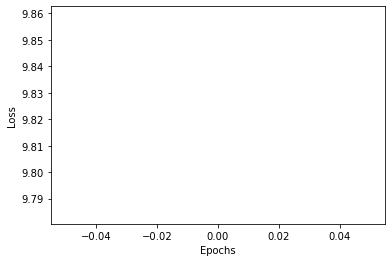

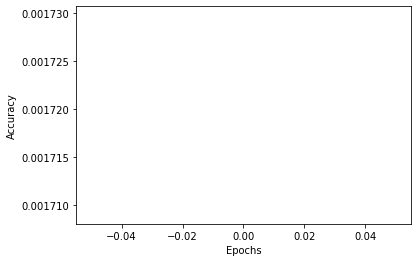

In [192]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [50]:
x=[]
for i in X[:150]:
    x.append(di[i])
print(x)
x = np.array(x)

[4279, 5704, 1642, 14499, 4083, 22450, 1935, 20230, 8624, 22450, 1744, 597, 16163, 2661, 1877, 6071, 597, 4575, 14636, 1791, 9027, 7957, 5743, 21285, 928, 4729, 9548, 19957, 3270, 6549, 14837, 25042, 977, 7859, 18435, 18193, 6072, 5387, 6087, 1910, 31771, 17647, 6283, 5956, 13617, 19716, 27679, 6133, 3780, 6586, 2626, 3779, 6136, 629, 704, 3099, 6471, 5517, 1990, 536, 30893, 7922, 19822, 25607, 10485, 2031, 4864, 18094, 8118, 7652, 15079, 15306, 7371, 13903, 3450, 1125, 7706, 26474, 642, 355, 1528, 1647, 1004, 1488, 3020, 4224, 2262, 13122, 11486, 785, 5535, 5530, 1490, 11096, 428, 2473, 2481, 1965, 4900, 9525, 16787, 12197, 9039, 12530, 1997, 267, 4081, 14628, 111, 1717, 1958, 1198, 1717, 3983, 3982, 3469, 428, 5365, 1526, 10370, 16534, 13636, 11410, 693, 6449, 808, 2558, 9207, 2298, 1788, 1046, 7010, 1455, 10577, 579, 9672, 13602, 1282, 5724, 14593, 31064, 22840, 15450, 19874, 1315, 2994, 8090, 4099, 12637, 12109]


In [196]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if val == value:
             return key

In [193]:
x = np.array(X[:50,:], dtype=int)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [194]:
input = '5784982'
pred = model.predict_classes(x, verbose=1)
pred

2/2 [==============================] - 1s 8ms/step


array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200], dtype=int64)

In [205]:
for i in range(x.shape[0]):
    print( ",".join( [str(f) for f in x[i]]) + " -> " + str(pred[i]))
    print( ",".join([str(get_key(di, f[0])) for f in x[i]]) + " -> " + str(get_key(di, pred[i])))

[4279],[5704] -> 200
5784982,5795273 -> 5809911
[5704],[1642] -> 200
5795273,5670334 -> 5809911
[1642],[14499] -> 200
5670334,5735272 -> 5809911
[14499],[4083] -> 200
5735272,5563536 -> 5809911
[22450],[1935] -> 200
5882900,5745715 -> 5809911
[20230],[8624] -> 200
5827351,5889616 -> 5809911
[8624],[22450] -> 200
5889616,5882900 -> 5809911
[597],[16163] -> 200
5838938,5883104 -> 5809911
[16163],[2661] -> 200
5883104,5819270 -> 5809911
[2661],[1877] -> 200
5819270,5852393 -> 5809911
[1877],[6071] -> 200
5852393,5819251 -> 5809911
[597],[4575] -> 200
5838938,5883100 -> 5809911
[4575],[14636] -> 200
5883100,5819243 -> 5809911
[14636],[1791] -> 200
5819243,5883103 -> 5809911
[1791],[9027] -> 200
5883103,5852396 -> 5809911
[9027],[7957] -> 200
5852396,5883101 -> 5809911
[7957],[5743] -> 200
5883101,5807839 -> 5809911
[5743],[21285] -> 200
5807839,5852397 -> 5809911
[21285],[928] -> 200
5852397,5807844 -> 5809911
[928],[4729] -> 200
5807844,5823410 -> 5809911
[4729],[9548] -> 200
5823410,5808